## Estimated VAR Model

In [285]:
# for AR model : y(t) = c + A1*y(t-1) + A2*y(t-2) + ... Ap*y(t-p)
# y(t) is n x 1 vector

# Input :
# − data is the datasets (format data = [y(1) y(2) ... y(N)])
#   yx(t) is the value of data at time equals to t.
#       example :
#                 |  y1(1)  y1(2)  ... y1(N)  |   
#                 |  y2(1)  y2(2)  ... y2(N)  |
#       data  =   |    .      .          .    | ; n is the dimension of time series
#                 |    .      .          .    |   N is the number of time points in the data
#                 |  yn(1)  yn(2)  ... yn(N)  |
#  
# - p is the lag-order of AR model.

# Output:
# - c is estimated parameter of AR model
#   c is n x 1 vector
# - Ahat is estimated parameter of AR model
#   Ahat = (A1, A2, ..., Ap)
# - Yhat is estimated of data
# - deltaY is data(p+1:N) - Yhat(p+1:N)
# - SIGMAhat is covariance matrix
# ------------------------------------------------------------------------------
import numpy as np

def ARestLS(data,p):
    n = len(data)    # num of all signals
    N = len(data[0]) # num of all time point (equal all signal)

    Y = data[:,p:N]  # Y = all row  & column p+1 to N of data
                     # because model is require p parameter for predict next step
    
    # create H matrix
    H = np.ones(N-p) # first row [1 1 1 ... 1] มี 1 N-p ตัว เช่น 1000-15 = 985 ตัว
    for i in range(p):
        # add second row , third row and the orther        
        H = np.vstack((H,data[:,p-i:N-i]))    
        
    HHT = np.dot(H,H.transpose())
    
    #check if H*H’ is NOT invertible, return an error message
    try:
        invHHT = np.linalg.inv(HHT)
    except np.linalg.LinAlgError:
        # Not invertible
        return "H*H' matrix is close to singular or badly scaled, you can try to change p"
    else:
        YHT = np.dot(Y,H.transpose())
    
    Aest = np.dot(YHT,HHT) # Aest = Y*H’/(H*H’) = [c A1 A2 ... Ap] 
    Yhatm = np.dot(Aest,H)
    c = Aest[:,0] # then Aest = [c A1 A2 ... Ap] 
    AestNotC = Aest[:,1:] # AestNotC = [A1 A2 ... Ap] (nx(np))
    
    #แปลง AestNotC เป็น (nxn) p ก้อน = A1, A2, ..., Ap
    Ahat = [] 
    for j in range(p):
        Aj = AestNotC[:,j*n:(j+1)*n]
        Ahat.append(Aj)
    
    Yhat = np.hstack((data[:,0:p],Yhatm)) # ทำให้ข้อมูล predict เท่ากับข้อมูลตั้งต้น
    deltaY = Y-Yhatm #Y−Yest when p+1−N 
    SIGMAhat = (1/(N-p))*np.dot(deltaY,deltaY.transpose())
    output = []
    output.append(c)
    output.append(Ahat)
    output.append(Yhat)
    output.append(deltaY)
    output.append(SIGMAhat)
    return output

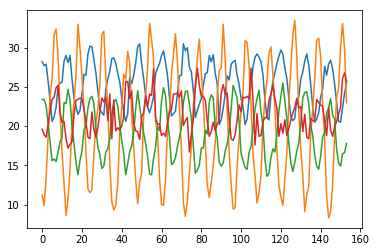

In [287]:
# ---- Cleaning & Rearrange Dataset ----
from pandas import Series
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
import numpy as np

# dataset
series1 = Series.from_csv('data/TempAustralia.csv', header=0)
series2 = Series.from_csv('data/TempAsia.csv', header=0)
series3 = Series.from_csv('data/TempNZ.csv', header=0)
series4 = Series.from_csv('data/TempUSA.csv', header=0)

# make key:value structure to 2-dimensional labeled data structure 
values1 = DataFrame(series1.values) 
values2 = DataFrame(series2.values) 
values3 = DataFrame(series3.values) 
values4 = DataFrame(series4.values) 

# add multi data to the same set
dataframe = concat([values1, values2, values3, values4], axis=1)
data_arr = np.array(dataframe)
data_tran = data_arr.transpose()

pyplot.plot(data_arr)
pyplot.show()

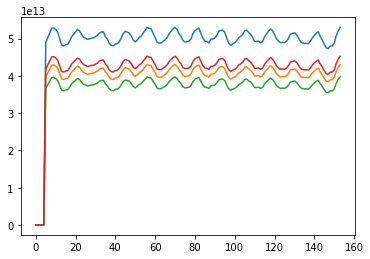

In [288]:
# ---- Explore VAR Model ----
Yhat = ARestLS(data_tran,5)[2]
YhatTr = Yhat.transpose()
pyplot.plot(YhatTr)
pyplot.show()
# print(YhatTr)